# Lecture 3: Introduction to NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
stock_list = [3.5,5,2,8,4.2]

In [ ]:
returns = np.array(stock_list)
print(returns, type(returns))

[3.5 5.  2.  8.  4.2] <class 'numpy.ndarray'>


In [ ]:
A = np.array([[1,2],[3,4]])
print(A,type(A))

[[1 2]
 [3 4]] <class 'numpy.ndarray'>


In [ ]:
print(A.shape)

(2, 2)


In [ ]:
print(returns[0],returns[len(returns)-1])

3.5 4.2


In [ ]:
print(returns[1:3])

[5. 2.]


In [ ]:
print(A[:,0])

[1 3]


In [ ]:
print(A[0,:])

[1 2]


In [ ]:
print(type(A[0,:]))

<class 'numpy.ndarray'>


In [ ]:
print(np.log(returns))

[1.25276297 1.60943791 0.69314718 2.07944154 1.43508453]


In [ ]:
print(np.mean(returns))

4.54


In [ ]:
returns*2+5

array([12. , 15. ,  9. , 21. , 13.4])

In [ ]:
print( "Mean: ",np.mean(returns), "Std Dev: ",np.std(returns))

Mean:  4.54 Std Dev:  1.9915822855207364


In [ ]:
N=10
assets = np.zeros((N,100))
returns = np.zeros((N,100))

In [ ]:
N=10
assets = np.zeros((N,100))
returns = np.zeros((N,100))

R_1 = np.random.normal(1.01,0.03,100)
returns[0] = R_1
assets[0] = np.cumprod(R_1)

In [ ]:
# Generate assets that are correlated with R_1
for i in range(1,N):
  R_i = R_1+np.random.normal(0.001,0.02,100)
  returns[i] = R_i
  assets[i] = np.cumprod(R_i)

mean_returns = [(np.mean(R)-1)*100 for R in returns]
return_votailties = [np.std(R) for R in returns]

Text(0.5, 1.0, 'Returns for 10 Random Assets')

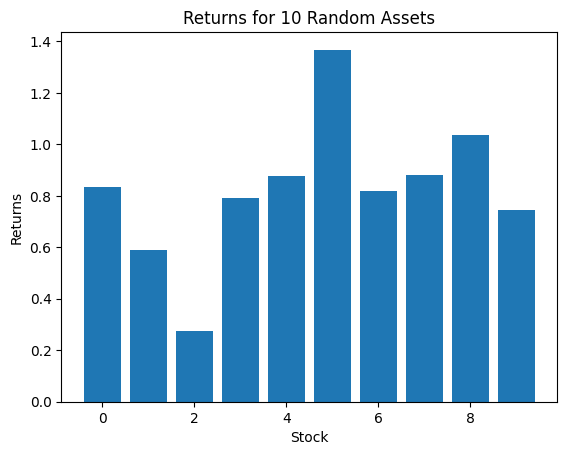

In [ ]:
plt.bar(np.arange(len(mean_returns)),mean_returns)
plt.xlabel('Stock')
plt.ylabel('Returns')
plt.title('Returns for {0} Random Assets'.format(N))

In [ ]:
weights = np.random.uniform(0,1,N)
weights = weights/np.sum(weights)

In [ ]:
p_returns = np.dot(weights,mean_returns)
print("Expected return of the portfolio:", p_returns)

Expected return of the portfolio: 0.866821616685482


In [ ]:
v= np.array([1,2,np.nan,4,5])
print(v)

[ 1.  2. nan  4.  5.]


In [ ]:
print(np.mean(v))

nan


In [ ]:
np.isnan(v)

array([False, False,  True, False, False])

In [ ]:
ix = ~np.isnan(v)
print(v[ix])

[1. 2. 4. 5.]


In [ ]:
print(np.nanmean(v))

3.0


In [ ]:
A = np.array([
        [1, 2, 3, 12, 6],
        [4, 5, 6, 15, 20],
        [7, 8, 9, 10, 10]
    ])
B = np.array([
        [4, 4, 2],
        [2, 3, 1],
        [6, 5, 8],
        [9, 9, 9]
    ])

In [ ]:
print(np.dot(A, B))

ValueError: shapes (3,5) and (4,3) not aligned: 5 (dim 1) != 4 (dim 0)

In [ ]:
print(np.dot(B,A))

[[ 34  44  54 128 124]
 [ 21  27  33  79  82]
 [ 82 101 120 227 216]
 [108 135 162 333 324]]


In [ ]:
cov_mat = np.cov(returns)
print(cov_mat)

[[0.00082874 0.00091047 0.00086774 0.00079908 0.00074297 0.00080613
  0.00086543 0.00084315 0.00084835 0.00083632]
 [0.00091047 0.00135583 0.00092952 0.00085144 0.00082549 0.00088567
  0.00091023 0.00087896 0.0008813  0.00093161]
 [0.00086774 0.00092952 0.0014249  0.00089027 0.00080676 0.00082034
  0.00089628 0.00093984 0.00087759 0.00089292]
 [0.00079908 0.00085144 0.00089027 0.00121428 0.00069843 0.00079596
  0.00083028 0.00084207 0.00086538 0.00082351]
 [0.00074297 0.00082549 0.00080676 0.00069843 0.00100763 0.00074417
  0.00086678 0.00072007 0.00075059 0.00071935]
 [0.00080613 0.00088567 0.00082034 0.00079596 0.00074417 0.00120936
  0.00083554 0.00079355 0.00085142 0.00084239]
 [0.00086543 0.00091023 0.00089628 0.00083028 0.00086678 0.00083554
  0.0013709  0.00091875 0.00093956 0.00083991]
 [0.00084315 0.00087896 0.00093984 0.00084207 0.00072007 0.00079355
  0.00091875 0.00132911 0.00086078 0.00088351]
 [0.00084835 0.0008813  0.00087759 0.00086538 0.00075059 0.00085142
  0.00093956

In [ ]:
print(A)

[[ 1  2  3 12  6]
 [ 4  5  6 15 20]
 [ 7  8  9 10 10]]


In [ ]:
print(np.transpose(A))

[[ 1  4  7]
 [ 2  5  8]
 [ 3  6  9]
 [12 15 10]
 [ 6 20 10]]


In [ ]:
# Calculating the portfolio volatility
var_p = np.dot(np.dot(weights,cov_mat),weights.T)
vol_p = np.sqrt(var_p)
print("Portfolio volatility: ", vol_p)

Portfolio volatility:  0.02944678764701782


In [ ]:
# Confirming calculation
vol_p_alt = np.sqrt(np.var(np.dot(weights, returns), ddof=1))
print("Portfolio volatility: ", vol_p_alt)

Portfolio volatility:  0.029446787647017813
